In [86]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import CondensedNearestNeighbour

#set means and covs for the two classes
mean1=[0, 0]
cov1=[[1,0],[0,1]]
mean2=[3, 3]
cov2=[[2,0],[0,2.5]]

#set seed as 1 for future repeats
np.random.seed(seed=1)

#generate "random" points for the two distributions
x1, y1 = np.random.multivariate_normal(mean1, cov1, 10000).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 10000).T
X=np.array(list(zip(np.concatenate([x1,x2]),np.concatenate([y1,y2]))))
y=np.array([0]*10000+[1]*10000)

#generate train and test groups
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


#set color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#set hyperparameters
h = .02 
n_neighbors = 1  #this is k


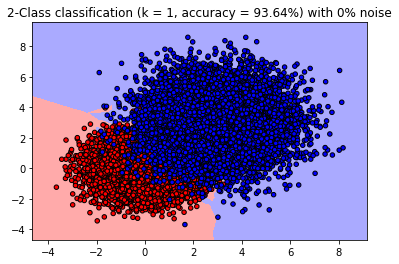

In [83]:

#model fitting
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='euclidean',algorithm='ball_tree')
clf.fit(X_train, y_train)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#determine prediction accuracy
prediction=clf.predict(X_test)
accuracy = round(accuracy_score(y_test, prediction),4)

#show plot
plt.title("2-Class classification (k = {}, accuracy = {}%) with 0% noise".format(n_neighbors,accuracy*100))

plt.show()

# the above is with 0% noise

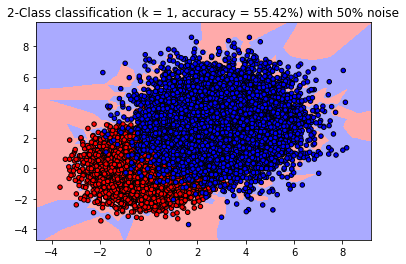

In [84]:
"""
this is to make 50% noise
"""
#set means and covs for the two classes
mean1=[0, 0]
cov1=[[1,0],[0,1]]
mean2=[3, 3]
cov2=[[2,0],[0,2.5]]

#set seed as 1 for future repeats
np.random.seed(seed=1)

#generate "random" noise points for the two distributions
x1_noise, y1_noise = np.random.multivariate_normal(mean1, cov1, 3333).T
x2_noise, y2_noise = np.random.multivariate_normal(mean2, cov2, 3333).T
X_noise=np.array(list(zip(np.concatenate([x1_noise,x2_noise]),np.concatenate([y1_noise,y2_noise]))))
y_noise=np.array([1]*3333+[0]*3333)

#giving noise to training set
X_train = np.concatenate([X_train,X_noise])
y_train = np.concatenate([y_train,y_noise])

#model fitting
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='euclidean',algorithm='ball_tree')
clf.fit(X_train, y_train)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#determine prediction accuracy
prediction=clf.predict(X_test)
accuracy = round(accuracy_score(y_test, prediction),4)

#show plot
plt.title("2-Class classification (k = {}, accuracy = {}%) with 50% noise".format(n_neighbors,accuracy*100))

plt.show()
